# Table of Contents

- [Introduction](#Introduction)
- [Google Trends](#Google-Trends)
- [Twitter](#Twitter)
- [Extra Analysis: Trump-Mueller-Russia Network](#Trump/Mueller/Russia-Network)
- [Conclusion](#Conclusion)
- [Addendum](#Addendum)

# Introduction

We plan to analyze trends related specific concepts and people across different social platforms. Specifically we want to investigate how political issues and figures in social media gain and lose relevance or interest by seeing how these entities are bounced around individual platforms (i.e. retweeting, individual subreddits) and across the different platforms. The ultimate goal is to find out what keeps these conversations relevant, and in particular for this project, how political figures influence the relative interest and relevance of issues within the public sphere.

For this project, we took multiple approaches to examining the public perception of Donald Trump, and how it relates to public thought regarding various issues related to him. In this case, we chose to use Twitter and Google Trends data to examine this dichotomy with the issues of the Russia/Mueller Investigation, Iran, and North Korea.

# Google Trends

This section uses Google trends to find any noticeable patterns between interest in Donald Trump and certain political topics. The topics covered in here are:

-  [North and South Korea Talks](#Trump-and-Korea)
-  [Iran Deal](#Trump-and-Iran)

It was run using two different jupyter Notebooks so we will have two different subsections with very similar code. 

## Trump and Korea
We can use the Google Trends API, and in particular a third party library for Google Trends called pytrends to measure search interest in various topics. First we can measure the raw data over a period of time for say, "trump" and "korea." This can contrast with the Twitter data since searching for a topic can also indicate interest, but of a more passive, and potentially unrestricted kind, since it does not require the person in question to make put out something publicly accessible.

Here we can plot the relative interest in the two aforementioned phrases over a certain period of time, in this case, 5/1/18 to 5/8/18

Before running this notebook, install the pytrends library by calling: pip install pytrends

In [1]:
from pytrends.request import TrendReq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Login to Google. Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

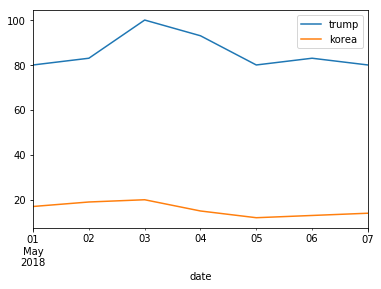

In [2]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()

pytrend.build_payload(kw_list=['trump', 'korea'],geo='US',timeframe='2018-05-01 2018-05-08')

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
# print(interest_over_time_df)
# interest_over_time_df = interest_over_time_df.cumsum()
interest = interest_over_time_df[['trump','korea']]
plt.figure()
p = interest.plot()
plt.show()

However, it may be difficult to read how they relate from these raw graphs. Since our intention is to be able to view their relationship, it would be nice to be able to contrast the two trends. The major differnece in magnitude of interest between them can somewhat obscure how the two trends correlate. For these purposes, if we want, we can also view the correlation between two topics, say, we want to see the correlation between trump and korea.

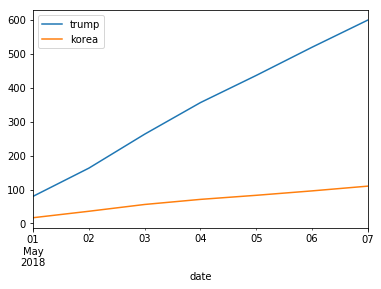

In [74]:
plt.figure()
interest_over_time_df.cumsum().plot()
plt.show()

If we want, we can also view the correlation between two topics, say, we want to see the correlation between trump and korea

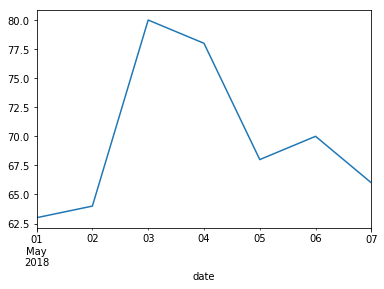

In [75]:
interest_over_time_df['difference']=interest_over_time_df['trump']-interest_over_time_df['korea']
plt.figure()
interest_over_time_df['difference'].plot()
plt.show()

We can see that the difference between the two spikes and then goes down, similar to the Iran data, even though the overall data is quite different. Because the magnitude of the interest is significantly different for the two topics, it may prove to be useful, for the purposes of comparing trends between the two, to normalize the data. There are some ways we can do this, either normalizing by the max, or the mean, as shown below.

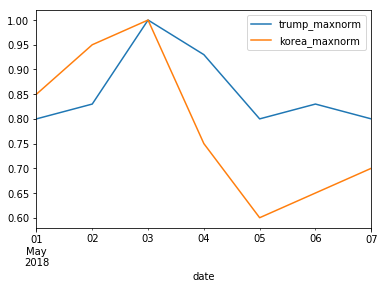

In [76]:
interest_over_time_df['trump_maxnorm']=interest_over_time_df['trump']*1/interest_over_time_df['trump'].max()
interest_over_time_df['korea_maxnorm']=interest_over_time_df['korea']*1/interest_over_time_df['korea'].max()
interest_norm = interest_over_time_df[['trump_maxnorm','korea_maxnorm']]
plt.figure()
p = interest_norm.plot()
plt.show()

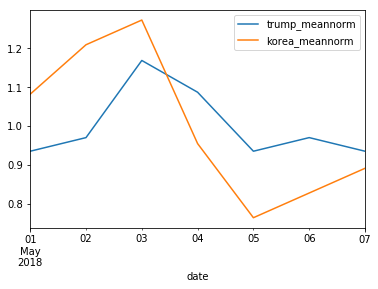

In [77]:
interest_over_time_df['trump_meannorm']=interest_over_time_df['trump']*1/interest_over_time_df['trump'].mean()
interest_over_time_df['korea_meannorm']=interest_over_time_df['korea']*1/interest_over_time_df['korea'].mean()
interest_meannnorm = interest_over_time_df[['trump_meannorm','korea_meannorm']]
plt.figure()
p = interest_meannnorm.plot()
plt.show()

### Analysis of Overall Interest
Overall, we can see that interest in Trump tends to  correlate with interest in Korea, except with a delay when it comes to increases. We can also see that overall, Trump tends to dominate the conversation, as interest in him persists even as the interest in Korea starts to decrease. This could also be because for Americans, North Korea generally entails Trump, but not the other way around.

### Regional Breakdown
We can also break down interest by region of the country to see where there is the greatest interest in the topic. We can see that Trump tends to draw the highest interest in a lot of northern, generally bluer states like Vermont or Oregon. Meanwhile, we can see that interest in the Korea issue tends to concentrate heavily on western states that may be potentially at risk from a North Korean strike. Contrast this with the Iran issue, wherein the distribution of interest in states was fairly random and was not geographically related. 

                      trump  korea
geoName                           
Mississippi              32      7
Louisiana                33      4
South Carolina           34      6
Oklahoma                 34      9
Alabama                  35      8
Utah                     35      8
Wyoming                  37      6
Arkansas                 37      7
West Virginia            38      7
Idaho                    38     11
Georgia                  39      9
Alaska                   40     22
Texas                    40      9
North Dakota             40     10
Kentucky                 40      8
Nevada                   41     11
Missouri                 41     11
North Carolina           42      7
Tennessee                42      7
Nebraska                 42      9
South Dakota             43     12
Iowa                     43      7
Hawaii                   44     18
Kansas                   44      7
Indiana                  45     10
Arizona                  48      9
New Mexico          

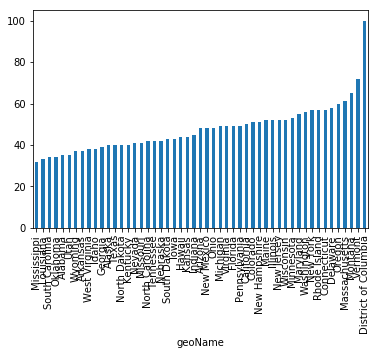

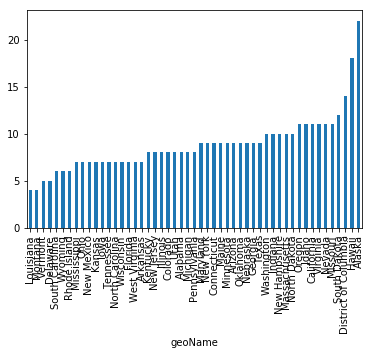

In [81]:
interest_by_region_df = pytrend.interest_by_region()
interest_by_region_df=interest_by_region_df.sort_values('trump')
print(interest_by_region_df)

plt.figure()
p = interest_by_region_df['trump'].plot(kind='bar')
plt.show()

interest_by_region_df=interest_by_region_df.sort_values('korea')

plt.figure()
p = interest_by_region_df['korea'].plot(kind='bar')
plt.show()

## Trump and Iran

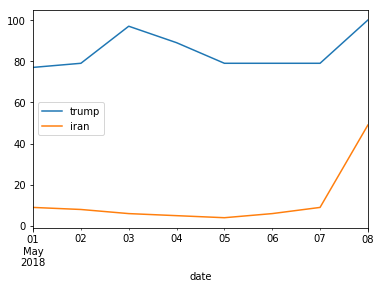

In [3]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()

pytrend.build_payload(kw_list=['trump', 'iran'],geo='US',timeframe='2018-05-01 2018-05-08')

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
# print(interest_over_time_df)
# interest_over_time_df = interest_over_time_df.cumsum()
interest = interest_over_time_df[['trump','iran']]
plt.figure()
p = interest.plot()
plt.show()

We can also view the cumulative sum of interest to see the rate of change

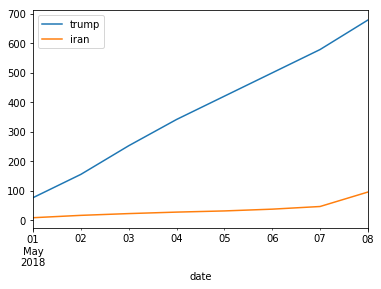

In [4]:
plt.figure()
interest_over_time_df.cumsum().plot()
plt.show()

However, it may be difficult to read how they relate from these raw graphs. Since our intention is to be able to view their relationship, it would be nice to be able to contrast the two trends. The major differnece in magnitude of interest between them can somewhat obscure how the two trends correlate. For these purposes, if we want, we can also view the correlation between two topics, say, we want to see the correlation between trump and iran.

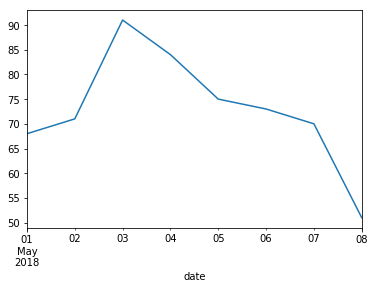

In [5]:
interest_over_time_df['difference']=interest_over_time_df['trump']-interest_over_time_df['iran']
plt.figure()
interest_over_time_df['difference'].plot()
plt.show()

So we can see that the magnitude of the difference spikes and then goes down. This could do with the fact that there was an increased interest in Trump-related issues or it could be related to a spike in interest in Iranian issues, especially regarding the nuclear deal, but it's hard to tell. Because the magnitude of the interest is significantly different for the two topics, we may still want to be able to view trends, so that we can see things like whether one is declining relative to the other. It may prove to be useful, for the purposes of comparing trends between the two, to normalize the data. There are some ways we can do this, either normalizing by the max, or the mean, as shown below.

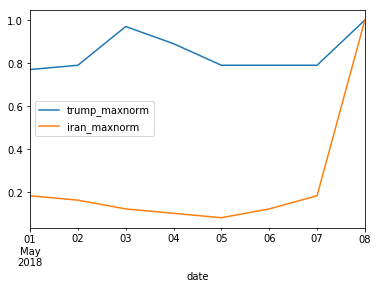

In [6]:
interest_over_time_df['trump_maxnorm']=interest_over_time_df['trump']*1/interest_over_time_df['trump'].max()
interest_over_time_df['iran_maxnorm']=interest_over_time_df['iran']*1/interest_over_time_df['iran'].max()
interest_norm = interest_over_time_df[['trump_maxnorm','iran_maxnorm']]
plt.figure()
p = interest_norm.plot()
plt.show()

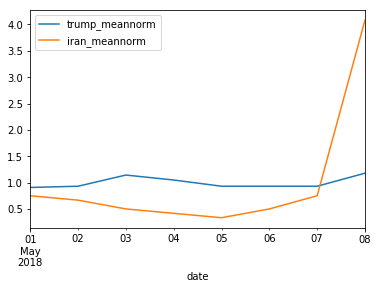

In [7]:
interest_over_time_df['trump_meannorm']=interest_over_time_df['trump']*1/interest_over_time_df['trump'].mean()
interest_over_time_df['iran_meannorm']=interest_over_time_df['iran']*1/interest_over_time_df['iran'].mean()
interest_meannnorm = interest_over_time_df[['trump_meannorm','iran_meannorm']]
plt.figure()
p = interest_meannnorm.plot()
plt.show()

### Analysis of Overall Interest
Overall, we can see that interest in Trump tends to negatively correlate with interest in Iran, except torwards the end, where we can see an increase in  interest, potentially because of the nuclear deal. We can also see that overall, Trump tends to dominate the conversation, and the fact that his peak coming before the slump in interest in Iran can indicate that in some cases, such as him having a major non-iran related issue, that he can decrease attention on related issues, or increase it.

### Regional Breakdown
We can also break down interest by region of the country to see where there is the greatest interest in the topic. We can see that Trump tends to draw the highest interest in a lot of northern, generally bluer states like Vermont or Oregon. Meanwhile, the interest in Iran tends to be pretty scattered as far as states are concerned, with some states like New Jersey, but also ones like Idaho or North Dakota, which represent a pretty wide spread socially and geographically.

                      trump  iran
geoName                          
Mississippi              31     5
Louisiana                32     6
North Dakota             33     6
Wyoming                  34     5
South Carolina           35     6
Oklahoma                 35     7
Alabama                  35     5
Utah                     37     5
Kentucky                 37     5
Arkansas                 38     6
West Virginia            39     5
Georgia                  39     6
Texas                    41     7
Idaho                    41     6
Tennessee                41     5
Nevada                   43     5
North Carolina           43     6
Nebraska                 44     6
Missouri                 44     6
Hawaii                   44     6
Kansas                   44     6
Iowa                     44     4
Indiana                  45     6
South Dakota             45     4
Ohio                     46     5
Florida                  47     7
Michigan                 47     6
Arizona       

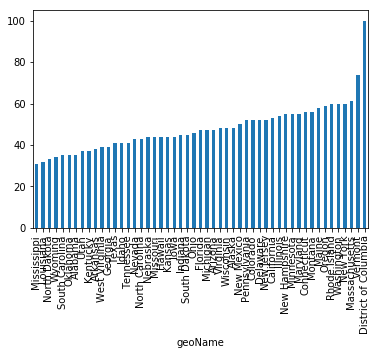

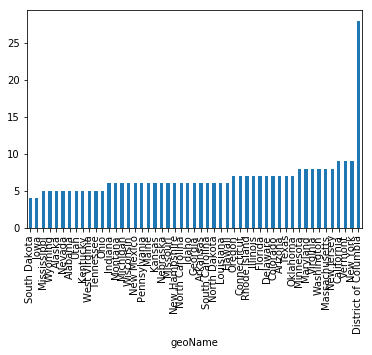

In [8]:
interest_by_region_df = pytrend.interest_by_region()
interest_by_region_df=interest_by_region_df.sort_values('trump')
print(interest_by_region_df)

plt.figure()
p = interest_by_region_df['trump'].plot(kind='bar')
plt.show()

interest_by_region_df=interest_by_region_df.sort_values('iran')

plt.figure()
p = interest_by_region_df['iran'].plot(kind='bar')
plt.show()

# Twitter 

We used the number of retweets on a tweet as the metric for how popular somethings is on Twitter, but that itself isn't very helpful. To find trends in how information is spread surrounding a specific topic, we instead plot how often that topic is retweeted around to see how trending something is. Since the Twitter API does not allow a standard key to access tweets past a week ago, we will use the recent topics of North Korea and South Korea talks and the Iran deal. We track tweets covering these topics by three different bodies: Donald Trump (as the figurehead), the general Twitter body, and Fox News.

Of course we cannot track all tweets surrounding a topic, so we query on each topic and pick the most popular/retweeted tweets throughout the past week. The cutoff itself is determined by the Twitter API.

Because these analyses of different topics were done in different jupter notebooks, code will not run succesfully without some renaming. By convention the graph of North/South Korea talks will be first followed by the graph concerning the Iran deal.

## Current Framework:

-  [Authorizing API Usage](#Authorizing-API-Usage)
-  [Finding Most Popular Tweets](#Finding-Most-Popular-Tweets)
-  [Intermediate Visualization](#Intermediate-Visualization)
-  [Request and Timestamp Retweets](#Request-and-Timestamp-Retweets)
-  [Final Visualizations and Analysis](#Final-Visualizations-and-Analysis)

## Authorizing API Usage

Done in the Addendum [here](#Authorizing-API-Usage:-All)

## Finding Most Popular Tweets

The code is pretty straightforward, as we're trying to get the most popular tweets in the past week. We do this recursively, using the last Tweet ID that we get as the maxiumum ID of the next search of Tweets.
The code for finding most popular tweets about Korea is shown below, while the one for Iran is [here](#Finding-Most-Popular-Tweets:-Iran)

In [4]:
keyword = "korea"
popular_ids = [[], [], []]
date_pop = [{}, {}, {}]

search = api.GetSearch(term=keyword, since='2018-05-01', until='2018-05-08', 
                       result_type='popular', count=100)
next_max_id = 0
min_retweet = 10000
for tweet in search:
    min_retweet = min(min_retweet, tweet.retweet_count)
    
    popular_ids[0].append(tweet.id)
    date_pop[0][tweet.created_at] = tweet.retweet_count
    
    if (tweet.user.name=='Donald J. Trump') :
        popular_ids[1].append(tweet.id)
        date_pop[1][tweet.created_at] = tweet.retweet_count
    elif (tweet.user.name=='Fox News') :
        popular_ids[2].append(tweet.id)
        date_pop[2][tweet.created_at] = tweet.retweet_count
    
    next_max_id = tweet.id

temp_min = min_retweet
while (len(search) > 0 and temp_min >= min_retweet) :
    temp_min = min_retweet
    search = api.GetSearch(keyword, since='2018-05-01', until='2018-05-08', 
                           result_type='popular', max_id=next_max_id, count=100)
    for tweet in search:
        if tweet.retweet_count >= min_retweet :
            popular_ids[0].append(tweet.id)
            date_pop[0][tweet.created_at] = tweet.retweet_count
        temp_min = min(temp_min, tweet.retweet_count)
        next_max_id = tweet.id
        
        if (tweet.user.name=='Donald J. Trump') :
            popular_ids[1].append(tweet.id)
            date_pop[1][tweet.created_at] = tweet.retweet_count
        elif (tweet.user.name=='Fox News') :
            popular_ids[2].append(tweet.id)
            date_pop[2][tweet.created_at] = tweet.retweet_count
        
print (popular_ids[0])     # Korea in general
print (popular_ids[1])     # Korea @realDonaldTrump
print (popular_ids[2])     # Korea @foxNews

[991644756995444736, 991758008068734976, 991861495117090817, 991845028048785408, 991809653980966913, 991759604034998273, 991846650531336192, 991865178835902465, 991911950475976706, 992792270515535873, 992053651119239168, 991887313025167362, 992004855127531520, 992310853151047680, 992393096259256320, 991644756995444736, 991758008068734976, 991861495117090817, 991845028048785408, 991809653980966913, 991759604034998273, 991846650531336192, 991865178835902465, 991911950475976706, 992053651119239168, 991887313025167362, 992004855127531520, 992310853151047680, 992393096259256320]
[991644756995444736, 991809653980966913, 991644756995444736, 991809653980966913]
[]


## Intermediate Visualization

To get a sense of how popular tweets are compared to when they are posted, lets visualize that before any additional processing. The most popular tweets appear to be posted at two peaks: 11am - 2pm and 4pm - 6pm.

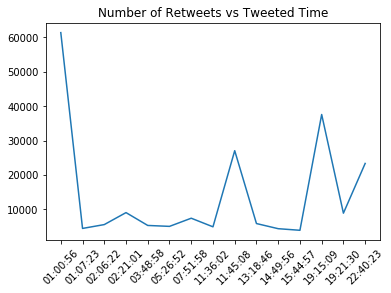

In [5]:
import matplotlib.pylab as plt
from matplotlib import pyplot

new_keys = [key.split(" " )[3] for key in date_pop[0].keys()]
count = date_pop[0].values()

new_dict = dict(zip(new_keys, count))
lists = sorted(new_dict.items())

x, y = zip(*lists) 

plt.plot(x, y)
plt.xticks(rotation=45)
plt.title('Number of Retweets vs Tweeted Time')
plt.show()

# Graph for North and South Korea talks

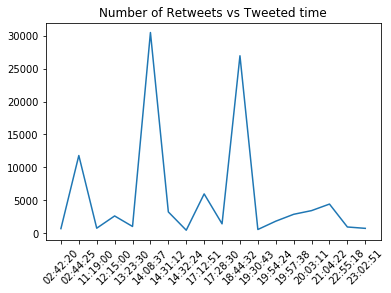

In [20]:
# Same code for Iran deal

## Request and Timestamp Retweets

The following code will be the same for both analyses. Be careful when running it because multiple runs in a short span will overuse API usage limits.

In [106]:
timestamps = [[], [], []]
timestamp_divs = [{}, {}, {}]

for i in range(3) :
    for j in range(len(popular_ids[i])) :
        temp_timestamp = []
        retweets = api.GetRetweets(popular_ids[i][j], count=100)
        for retweet in retweets:
            timestamps[i].append(retweet.created_at)
            temp_timestamp.append(retweet.created_at)
        
        timestamp_divs[i][j] = temp_timestamp

## Final Visualizations and Analysis

With the most recent 100 retweets of each popular Tweet, we can make a histogram of the number of retweets in specific time ranges for each body we are covering. The graphs are shown below the code with the following color scheme:
-  __green__: Tweets by the General Public
-  __orange__: Tweets by Donald Trump
-  __navy__: Tweets by Fox News

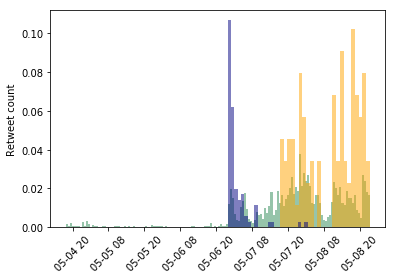

In [116]:
import pandas as pd

Tweetframe0 = pd.DataFrame(pd.to_datetime(timestamps[0]), columns=['Tweets'])      # General Public
Tweetframe1 = pd.DataFrame(pd.to_datetime(timestamps[1]), columns=['Tweets'])      # Trump
Tweetframe2 = pd.DataFrame(pd.to_datetime(timestamps[2]), columns=['Tweets'])      # Fox News
g = 6      # granularity

w_w = [1/len(timestamps[0]) for i in range(len(timestamps[0]))]
w_x = [1/len(timestamps[1]) for i in range(len(timestamps[1]))]
w_y = [1/len(timestamps[2])/4 for i in range(len(timestamps[2]))]

# Tweetframe.Date is a Series, which has a histogram method.
aw = Tweetframe0.Tweets.hist(xrot=45, alpha=0.5, weights=w_w, color='seagreen',
                             bins = (1 + (Tweetframe0.Tweets.max() - Tweetframe0.Tweets.min()).days)**2 * g)
ax = Tweetframe1.Tweets.hist(xrot=45, alpha=0.5, weights=w_x, color='orange',
                             bins = (1 + (Tweetframe1.Tweets.max() - Tweetframe1.Tweets.min()).days)**2 * g)
ay = Tweetframe2.Tweets.hist(xrot=45, alpha=0.5, weights=w_y, color='navy',
                             bins = (1 + (Tweetframe2.Tweets.max() - Tweetframe2.Tweets.min()).days)**2 * g)
ax.set_ylabel('Retweet count')
ax.grid('off')
plt.show()

# Graph for North and South Korea talks

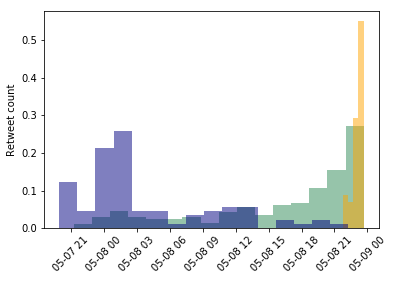

In [73]:
# Same code goes here for Iran deal

Since these histograms represent when the most recent 100 retweets were for each popular Tweet, more concentrated Tweets towards the right of the histogram are more popular on the Twitter platform. We immediately see that Trump is dominating the platform, with an extremely high concentration of retweets right when the data was taken.

However, we do see that in the North and South Korea talks that public interest in the topic and the tweets by Donald Trump on the topic have very similar trends. Instead of just seeing correlation in interest between the topic and a corresponding figurehead, we have that Donald Trump is actually a main driver in its popularity when making public statements about it. This can be seen in more extreme in the Iran deal, with Donald Trump's tweets being more prevalent and thereby generating a huge upswing in interest by the public Twitter body.

__As a sidenote__: We chose Fox News as a source because we wanted to see if Fox News and Donald Trump had a high correlation also along with the given topic. However, it is clear that Fox News does not remain prevalent even though there is a supposed feedback loop of ideas between Donald Trump and Fox News.

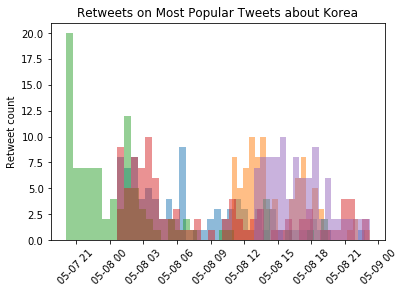

In [121]:
num_bins = g*2
num_tweets = 5

hists = []
                
for i in range(num_tweets) :
    Tweetframe = pd.DataFrame(pd.to_datetime(timestamp_divs[0][i]), columns=['Tweets'])
    hists.append(Tweetframe.Tweets.hist(xrot=45, 
                                        bins=(1 + ((Tweetframe.Tweets.max() - 
                                                    Tweetframe.Tweets.min())*6).days) * g,
                                        alpha=0.5))
    hists[i].set_ylabel('Retweet count')
    hists[i].grid('off')
plt.title('Retweets on Most Popular Tweets about Korea')
plt.show()

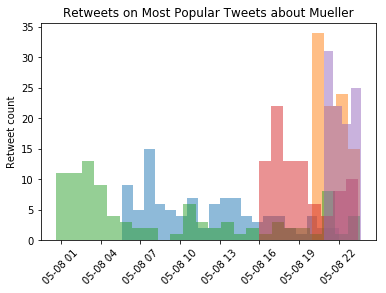

In [75]:
# Same code goes here for Iran Deal (there was a typo)

When moving to the popularity trends of individual tweets themselves, we have high degrees of variation between the histograms. This might be because of differing bodies of people in the public being interested in the topics, since more western states are interested in the South and North Korea news while the Iran deal has primary interest in the blue states. 

Still, we have strong correlation between general public interest in a topic and the interest in statements by a corresponding figurehead concerning the topic.

# Trump/Mueller/Russia Network

In this particular case, I wanted to examine some of the network dynamics that come from how closely related two actors are perceived to be. To do this I created a network between three actors wherein the links were meant to represent the amount of perceived "linkage," i.e. how much they are perceived to be as related or tied, as defining the weight of the links.

## Methods
In order to do this, I went to google's analytics page and looked at the trends for pairs of concepts such as 'trump mueller' (the results are equal within different orderings so 'mueller trump' would be equivalent), and then downloading the data for a specified time frame with the pairs representing 'links' and importing it into ORA.

### Meausures over time 
I chose to examine a few measures over time that are network-specific. Here is a sample of the measures that I thought were of particular interest. These are based upon the overall comparision of the three nodes of Trump, Mueller, and Russia

#### Total Degree Over Time
Total degree over time simply sums up the magnitudes of the edges for a given actor. What we can see here is that the three agents correlate pretty strongly with each other but that Trump tends to "reign supreme" and also tends to sustain himself more, even when the other two decline.
![Total Degree over Time](https://github.com/nivle1661/15-388-Final-Project/blob/master/Screen%20Shot%202018-05-09%20at%203.38.15%20PM.png?raw=true)

#### Authority Centrality Over Time
This is also carried over in authority centrality, which is supposed to be a measure of the "authority" of a given nde within the network. The other two nodes are more vulnerable than the Trump node. One of the interesting things about this graph is that Mueller and Russia tend to have an inverse correlation, seeming to imply that potentially discussion of Mueller could decrease the power of Russia, potentially because he's a new "player" in the discourse about the overall issue.
![Authority Centrality over time](https://github.com/nivle1661/15-388-Final-Project/blob/master/Screen%20Shot%202018-05-09%20at%203.50.13%20PM.png?raw=true)

#### Characteristic Path Length Over Time
Characteristic path length is the average length of a shortest path between two randomly selected vertices. What we can see is that in general, the path length increases and decreases periodically day by day, which would correlate with the levels of traffic.
![Characteristic path length over time](https://github.com/nivle1661/15-388-Final-Project/blob/master/Screen%20Shot%202018-05-09%20at%203.50.37%20PM.png?raw=true)

#### Weighted Density Over Time
Weighted density is the sum of the overall weight lengths, indicating that there was a major slump aroung May 5th, which could have correlated with other news issues distracting or a natural lull in public interest
![Weighted Density over time](https://github.com/nivle1661/15-388-Final-Project/blob/master/Screen%20Shot%202018-05-09%20at%203.50.56%20PM.png?raw=true)


### Visualization
With the nodes sized by degree
![Weighted Density over time](https://github.com/nivle1661/15-388-Final-Project/blob/master/Screen%20Shot%202018-05-09%20at%203.56.57%20PM.png?raw=true)


# Conclusion

In conclusion, from our analysis of the data that we have presented, we can see that there is a noticeable and significant connection between a political figure and the issues that they are associated with, in the case of Donald Trump. Trump can often very quickly stir up interest around an issue that is visible in internet traffic. However, he sometimes can "smother" the topic, wherein the amount of attention focused on him begins to down out attention focused on the topic.

In the future, we would like to be able to examine how this changes for other political figures as well, as well as potentially being able to connect it with a broader range of issues, including more domestic issues.

# Addendum

### Authorizing API Usage: All

Before continuing any step, first download the pyhton-twitter library by running the command: pip install python-twitter

In [1]:
import twitter
import os
import json

from twitter import Api
ACCESS_TOKEN = '4561681106-aArApevY4gEacJCctlojqdYKrdzG8jQaThyMmLa'
ACCESS_SECRET = 'J4sxAN8RRzNfY1Ip36QKEQdnfkO0QWjjIZRzWcW4XKOSY'
CONSUMER_KEY = '16rKpXE6CKiorkmrWXIOoajUk'
CONSUMER_SECRET = 'AOfor1zTkI6Ir5CYvGTZEzvyakncAbmzs7cJK4ZmKtZQwVNE0R'

api = Api(consumer_key = CONSUMER_KEY,
          consumer_secret = CONSUMER_SECRET,
          access_token_key = ACCESS_TOKEN,
          access_token_secret = ACCESS_SECRET)

In [2]:
import requests
from requests_oauthlib import OAuth1
url = 'https://api.twitter.com/1.1/account/verify_credentials.json'
auth = OAuth1(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_SECRET)
requests.get(url, auth=auth)

<Response [200]>

### Finding Most Popular Tweets: Iran

In [18]:
keyword = "Iran"
popular_ids = [[], [], []]
date_pop = [{}, {}, {}]

search = api.GetSearch(term=keyword, since='2018-05-01', until='2018-05-08', 
                       result_type='popular', count=100)
next_max_id = 0
min_retweet = 10000
for tweet in search:
    min_retweet = min(min_retweet, tweet.retweet_count)
    
    popular_ids[0].append(tweet.id)
    date_pop[0][tweet.created_at] = tweet.retweet_count
    
    if (tweet.user.name=='Donald J. Trump') :
        popular_ids[1].append(tweet.id)
        date_pop[1][tweet.created_at] = tweet.retweet_count
    elif (tweet.user.name=='Fox News') :
        popular_ids[2].append(tweet.id)
        date_pop[2][tweet.created_at] = tweet.retweet_count
    
    next_max_id = tweet.id

temp_min = min_retweet
while (len(search) > 0 and temp_min >= min_retweet) :
    temp_min = min_retweet
    search = api.GetSearch(keyword, since='2018-05-01', until='2018-05-08', 
                           result_type='popular', max_id=next_max_id, count=100)
    for tweet in search:
        if tweet.retweet_count >= min_retweet :
            popular_ids[0].append(tweet.id)
            date_pop[0][tweet.created_at] = tweet.retweet_count
        temp_min = min(temp_min, tweet.retweet_count)
        next_max_id = tweet.id
        
        if (tweet.user.name=='Donald J. Trump') :
            popular_ids[1].append(tweet.id)
            date_pop[1][tweet.created_at] = tweet.retweet_count
        elif (tweet.user.name=='Fox News') :
            popular_ids[2].append(tweet.id)
            date_pop[2][tweet.created_at] = tweet.retweet_count
print (popular_ids[0])     # Iran in general
print (popular_ids[1])     # Iran @realDonaldTrump
print (popular_ids[2])     # Iran @foxNews

[993562242124865536, 993492804985872385, 993464211463290887, 993539169677991936, 993320619960930304, 993582035427053568, 993580637419458561, 993597431400075265, 993627250372247556, 993573862460809217, 993625347676622848, 993498487449780224, 993543105256312832, 993579822831030272, 993498791230631936, 993492804985872385, 993464211463290887, 993320619960930304, 993498487449780224, 993498791230631936, 993450118497034241, 993481451315384320, 993320095903567873]
[993562242124865536, 993492804985872385, 993492804985872385]
[993455121458753537]
